<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review of Databases and Tables Creation

_Instructor: Aymeric Flaisler_

---



## I) mongo (noSQL) with Python

First we need to check that the mongodb server is up and running. In you command line, try to connect to mongo shell by typing:
`mongo`

If you get an error, it probably means that the server is not started.

To start one, in the terminal enter:
`mongod &`

**Note:** The ` &` allows to make it run in the background.

## SQL vs. Mongo

* SQL - want to prevent redundancy in data by having tables with unique information and relations between them (normalized data).
    * Creates a framework for querying with joins.
    * Makes it easier to update database. Only ever have to change information in a single place.
    * This can result in "simple" queries being slower, but more complex queries are often faster.
* Mongo - document based storage system. Does not enforce normalized data. Can have data redundancies in documents (denormalized data).
    * No joins.
    * A change to database generally results in needing to change many documents.
    * Since there is redundancy in the documents, simple queries are generally faster. But complex queries are often slower.
    

|         | SQL          | Mongo          |
|---------|--------------|----------------|
| Schema  | Yes => Joins | No => No Joins |
| Storage | Table        | Collection     |
|         | Row          | Document       |
|         | Column       | Field          |

## Helpful commands for mongoDB

Helpful commands to get you started:

```javascript
help                        // List top level mongo commands

db.help()                   // List database level mongo commands

show dbs                    // Get list of databases on your system

use <database name>         // Change the database that you're current using

show collections            // Get list of collections within the database that you're currently using
```

## Querying

```javascript
db.users.find()                                     // returns the entire collection

db.users.find({ name: 'Jon'})                       // find by single field

db.users.find({ car: { $exists : true } })          // find by presence of field

db.users.find({ friends: 'Henry' })                 // find by value in array

db.users.find({}, { name: true })                   // field selection (only return name)
```

A quick way to figure out how to write a Mongo query is to think about how you would do it in SQL and check out a resource like this Mongo endorsed [conversion guide](https://docs.mongodb.com/manual/reference/sql-comparison/#create-and-alter), or use something like a [query translator](http://www.querymongo.com/).

## Updating

```javascript
db.users.update({name: "Jon"}, { $set: {friends: ["Phil"]}})            // replaces friends array

db.users.update({name: "Jon"}, { $push: {friends: "Susie"}})            // adds to friends array

db.users.update({name: "Stevie"}, { $push: {friends: "Nicks"}}, true)   // upsert

db.users.update({}, { $set: { activated : false } }, false, true)       // multiple updates
```

## mongo with python:

We need to load the module allowing us to connect to the mongodb server (tqdm is just use to get some verbosity).

Then we instantiate the connection:

In [1]:
import requests
from pymongo import MongoClient
from tqdm import tqdm

client = MongoClient()
db = client.my_new_database
collection = db.my_new_collection

#### Full example with the uk Police data:

I) We get the raw HTML:

In [5]:
# Here we are getting data for range of months and years
for year in range(2017,2018):
    for month in tqdm(range(1, 12)):
        # the next line requests the data for the specific date range
        r = requests.get('https://data.police.uk/api/crimes-no-location?category=all-crime&force=leicestershire&date={}-{}'.format(year, month))
# we now insert it into our mongodb collection
collection.insert_many(r.json())

100%|██████████| 11/11 [00:02<00:00,  4.00it/s]


In [2]:
# Remember to close the connection
client.close()

Always double check the data has been recorded:

In [6]:
from pprint import pprint

for item in collection.find({ 'category' : 'burglary' }):
    pprint(item)

{'_id': ObjectId('5ace87182a5c641259a2cf5b'),
 'category': 'burglary',
 'context': '',
 'id': 54725401,
 'location': None,
 'location_subtype': '',
 'location_type': None,
 'month': '2017-02',
 'outcome_status': {'category': 'Investigation complete; no suspect identified',
                    'date': '2017-02'},
 'persistent_id': '2f54b149a18892c1d19b2cb971e60af2daee051c563b57e7b0d4e3163e476180'}
{'_id': ObjectId('5ace87182a5c641259a2cf5c'),
 'category': 'burglary',
 'context': '',
 'id': 54732498,
 'location': None,
 'location_subtype': '',
 'location_type': None,
 'month': '2017-02',
 'outcome_status': {'category': 'Investigation complete; no suspect identified',
                    'date': '2017-02'},
 'persistent_id': 'b9c512d3c6408aa45276a50fcd66c119117ca23c5e07e700886eebc988a4e42a'}
{'_id': ObjectId('5ace87182a5c641259a2cf5e'),
 'category': 'burglary',
 'context': '',
 'id': 56862854,
 'location': None,
 'location_subtype': '',
 'location_type': None,
 'month': '2017-03',
 'outco

## II)  Local PostgreSQL Database with python

In order to get started with psql, you must have the server running. For mac the best is to use postgres.app (https://postgresapp.com/).

In order to follow the next cells, you need to (1) have the psql server running (double check the green status):
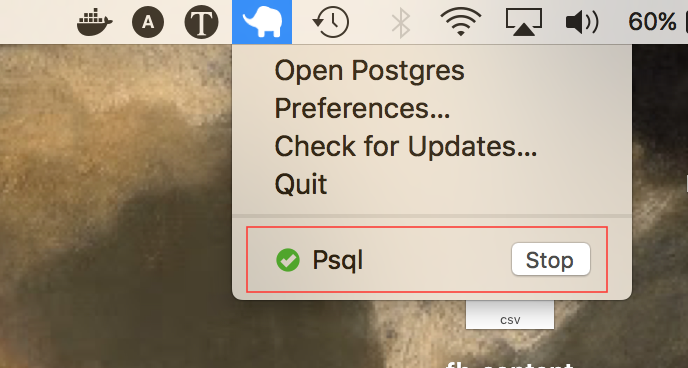


and (2) be able to connect to the psql shell without password (ie: entering "psql" in the command line should open the psql shell):
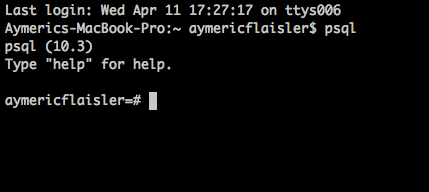

Now that the psql server is running and you have access to the shell, you can check the list of databases by entering: 

`\l`

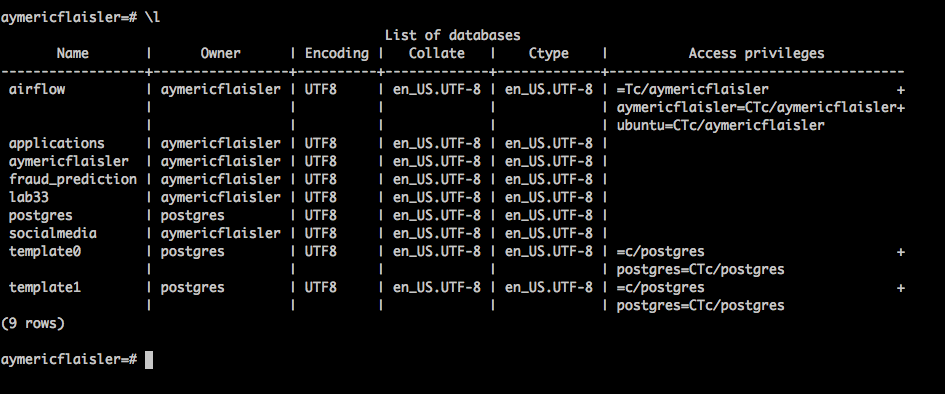

To select a database from psql shell, you need to first select it. To do so, do:  
`
\connect <name-database>
`
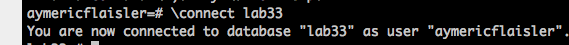

Finally, in order to get a description of the tables, enter: 
`
\d+
`
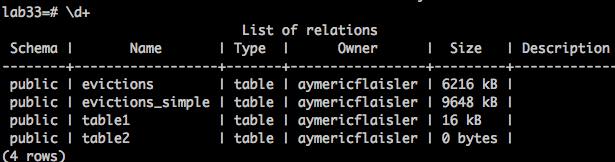

**Note:** the psql commands with a back slash (like `\d+`) do not require a semi-colons to be executed. ALL THE OTHERS DO. 
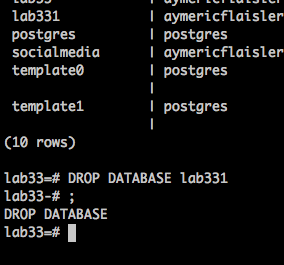

### II) 1) Creation of a database within psql


- We need a database to store data. In psql shell, enter:  

`CREATE DATABASE <Name_of_your_db>;`

(don't forget the semi-colon)

- Let's connect ourselves to the new database:

`\connect <Name_of_your_db>`

```
CREATE DATABASE lab33;
\connect lab33
```

- Now let's create our first table: 

```
CREATE TABLE scraping (
    id serial PRIMARY KEY,
    title varchar,
    link varchar);
```

### II) 2) Creation of a database with the python module psycopg2


Let's create a database 'chelsea' through the psycopg2 module :

In [83]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 

con = psycopg2.connect(dbname='postgres')
# con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

cur = con.cursor()
con.autocommit = True
cur.execute("DROP DATABASE lab33;")
cur.execute("CREATE DATABASE lab33;")
con.close()

Let's create a table 'scraping':

In [84]:
con = psycopg2.connect(dbname='lab33')

In [85]:
cur = con.cursor()

In [86]:
cur.execute('''CREATE TABLE scraping (
    id serial PRIMARY KEY,
    title varchar,
    link varchar);''')

In [87]:
cur.execute('''SELECT * FROM scraping;''')
cur.fetchall()

[]

In [88]:
con.close()

### II) 3) Creation of a database with the jupyter magic function ipython-sql


In [89]:
# - We need to load ipython-sql extension for jupyter notebook (pip install ipython-sql)

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [90]:
%%sql postgresql://localhost:5432/lab33

DROP TABLE IF EXISTS scraping;
CREATE TABLE scraping
(id serial PRIMARY KEY,
title varchar,
link varchar);


Done.
Done.


[]

### II) 4) Create a table using sqlalchemy and pandas

In [104]:
data = np.zeros((2,), dtype=[('A', 'int'),('B', 'float'),('C', 'object')])
df = pd.DataFrame(data, index=['first', 'second'])

In [108]:
df.dtypes

A      int64
B    float64
C     object
dtype: object

In [110]:
df.to_sql("table_from_pandas", engine)

In [111]:
%%sql postgresql://localhost:5432/lab33
        
SELECT * FROM table_from_pandas;

2 rows affected.


index,A,B,C
first,0,0.0,0
second,0,0.0,0


### III) 1) Query a database with psql shell

In the terminal enter `psql`

Then connect to your database:
`\c lab33`

Then query it:
`SELECT * FROM scraping;`


### II) 2) Query of a database with the python module psycopg2


In [91]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 

con = psycopg2.connect(dbname='lab33')
# con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cur = con.cursor()
cur.execute('''INSERT INTO scraping (title, link)
VALUES ('test','url.com');''')
con.commit() # you need to commit the query manually if con.autocommit = True not set
con.close()

In [92]:
con = psycopg2.connect(dbname='lab33')
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cur = con.cursor()

cur.execute('''SELECT * FROM scraping;''')
cur.fetchall()
# print(cur)

[(1, 'test', 'url.com')]

In [93]:
con.close()

# OR, using sqlalchemy and pandas:

### III) 3) Query a database with the jupyter magic function ipython-sql


In [94]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('postgresql://localhost:5432/lab33')
pd.read_sql("SELECT * FROM scraping LIMIT 10;", engine)

,id,title,link
0,1,test,url.com


### III) 3) Query a database with the jupyter magic function ipython-sql


In [95]:
%%sql postgresql://localhost:5432/lab33
        
SELECT * FROM scraping;

1 rows affected.


id,title,link
1,test,url.com
